# Buatlah visualisasi geospatial yang menunjukkan sebaran kasus positif covid19 di Indonesia berbasis provinsi

## Ryan Abdurohman, 1301191171

In [1]:
!wget https://github.com/Alf-Anas/batas-administrasi-indonesia/raw/master/batas_provinsi/Batas%20Provinsi%20SHP.zip

--2021-12-02 14:35:38--  https://github.com/Alf-Anas/batas-administrasi-indonesia/raw/master/batas_provinsi/Batas%20Provinsi%20SHP.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alf-Anas/batas-administrasi-indonesia/master/batas_provinsi/Batas%20Provinsi%20SHP.zip [following]
--2021-12-02 14:35:39--  https://raw.githubusercontent.com/Alf-Anas/batas-administrasi-indonesia/master/batas_provinsi/Batas%20Provinsi%20SHP.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 753577 (736K) [application/zip]
Saving to: ‘Batas Provinsi SHP.zip’

Batas Provinsi SHP. 100%[===================>] 735.92

In [4]:
# !apt install unzip
!unzip "Batas Provinsi SHP.zip"

Archive:  Batas Provinsi SHP.zip
  inflating: Batas Provinsi.shx      
  inflating: Batas Provinsi.cpg      
  inflating: Batas Provinsi.dbf      
  inflating: Batas Provinsi.prj      
  inflating: Batas Provinsi.qpj      
  inflating: Batas Provinsi.shp      


In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import json
%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [ ]:
id = gpd.read_file("Batas Provinsi.shp")
id.head()

In [5]:
prov = id.Provinsi.unique()
prov, prov.shape 

(array(['NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR', 'KALIMANTAN SELATAN',
        'KALIMANTAN UTARA', 'SULAWESI BARAT', 'MALUKU UTARA', 'RIAU',
        'DAERAH ISTIMEWA YOGYAKARTA', 'PAPUA', 'PAPUA BARAT',
        'KALIMANTAN TIMUR', 'BENGKULU', 'ACEH', 'SUMATERA UTARA',
        'KEPULAUAN BANGKA BELITUNG', 'SUMATERA BARAT', 'LAMPUNG',
        'DKI JAKARTA', 'JAWA TENGAH', 'KEPULAUAN RIAU', 'BALI',
        'KALIMANTAN BARAT', 'KALIMANTAN TENGAH', 'SULAWESI UTARA', 'JAMBI',
        'SULAWESI TENGAH', 'GORONTALO', 'JAWA BARAT', 'JAWA TIMUR',
        'MALUKU', 'SULAWESI SELATAN', 'SUMATERA SELATAN', 'BANTEN',
        'SULAWESI TENGGARA'], dtype=object), (34,))

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:903: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


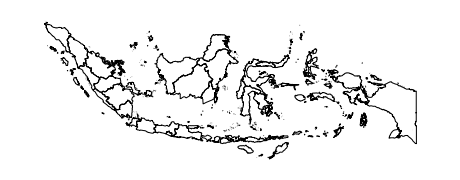

In [6]:
gplt.polyplot(id)

In [7]:
raw = json.loads(urllib.request.urlopen("https://data.covid19.go.id/public/api/prov.json").read())["list_data"]

In [8]:
raw[0]

{'doc_count': 20.297979756452527,
 'jenis_kelamin': [{'doc_count': 424323, 'key': 'LAKI-LAKI'},
  {'doc_count': 429064, 'key': 'PEREMPUAN'}],
 'jumlah_dirawat': 549,
 'jumlah_kasus': 864017,
 'jumlah_meninggal': 13596,
 'jumlah_sembuh': 849872,
 'kelompok_umur': [{'doc_count': 27981, 'key': '0-5', 'usia': {'value': 5.0}},
  {'doc_count': 83265, 'key': '6-18', 'usia': {'value': 18.0}},
  {'doc_count': 229564, 'key': '19-30', 'usia': {'value': 30.0}},
  {'doc_count': 252151, 'key': '31-45', 'usia': {'value': 45.0}},
  {'doc_count': 169334, 'key': '46-59', 'usia': {'value': 59.0}},
  {'doc_count': 87697, 'key': '≥ 60', 'usia': {'value': 36583.0}}],
 'key': 'DKI JAKARTA',
 'lokasi': {'lat': -6.204698991169558, 'lon': 106.83611829006928},
 'penambahan': {'meninggal': 0, 'positif': 70, 'sembuh': 0}}

In [9]:
rawdat = []
for dat in raw:
  temp = {}
  temp["Provinsi"] = dat['key']
  temp["case"] = dat["penambahan"]["positif"]
  rawdat.append(temp)

In [10]:
df_raw = pd.DataFrame(rawdat)
df_raw.head()

,Provinsi,case
0,DKI JAKARTA,70
1,JAWA BARAT,58
2,JAWA TENGAH,20
3,JAWA TIMUR,30
4,KALIMANTAN TIMUR,6


In [11]:
df = pd.merge(id, df_raw, on="Provinsi")
df.head()

,No,Kode_Prov,Provinsi,geometry,case
0,11.0,52,NUSA TENGGARA BARAT,"MULTIPOLYGON (((118.72881 -8.35901, 118.72886 ...",1
1,22.0,53,NUSA TENGGARA TIMUR,"MULTIPOLYGON (((122.65419 -8.63712, 122.62966 ...",10
2,25.0,63,KALIMANTAN SELATAN,"MULTIPOLYGON (((114.88632 -2.50353, 114.91290 ...",9
3,27.0,65,KALIMANTAN UTARA,"MULTIPOLYGON (((116.58930 4.37422, 116.61513 4...",1
4,30.0,76,SULAWESI BARAT,"MULTIPOLYGON (((119.86380 -1.96121, 119.87027 ...",1


In [12]:
df.Provinsi.nunique()

34

In [13]:
df = df.set_index("Provinsi")

In [14]:
df = df.drop(["No", "Kode_Prov"], axis=1)

In [15]:
df.head()

,geometry,case
Provinsi,,
NUSA TENGGARA BARAT,"MULTIPOLYGON (((118.72881 -8.35901, 118.72886 ...",1
NUSA TENGGARA TIMUR,"MULTIPOLYGON (((122.65419 -8.63712, 122.62966 ...",10
KALIMANTAN SELATAN,"MULTIPOLYGON (((114.88632 -2.50353, 114.91290 ...",9
KALIMANTAN UTARA,"MULTIPOLYGON (((116.58930 4.37422, 116.61513 4...",1
SULAWESI BARAT,"MULTIPOLYGON (((119.86380 -1.96121, 119.87027 ...",1


In [ ]:
ax = gplt.polyplot(df, 
                    figsize=(15, 10),
                   projection=gcrs.AlbersEqualArea())

gplt.choropleth(
    df,
    hue="case",
    edgecolor="white",
    linewidth=1,
    cmap="Reds",
    legend=True,
    scheme="FisherJenks",
#     legend_labels=[
#         "<3 million", "3-6.7 million", "6.7-12.8 million",
#         "12.8-25 million", "25-37 million"
#     ],
    projection=gcrs.AlbersEqualArea(),
    ax=ax
)